In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [76]:
#creating a 70:30 train-test split
def process_data(fname):
    df = pd.read_csv(fname,header=None,sep=',').sample(frac = 1)
    data=np.array(df)
    n_70=(len(df))-(int(0.3*len(df)))
    train=np.array(df[0:n_70])
    test=np.array(df[n_70:len(df)])
    return train,test

In [77]:
#predict target attribute
def predict(row,w):
    return 1 if (np.dot((w[1:]).T,row))+w[0] >=0 else 0

In [94]:
#performs perceptron algorithm
def perceptron(train,test,eta,n_itr):
    w= np.random.normal(0.0,1.0,len(train[0]))
    accuracy_array=[]
    itr_no=[]
    for i in range (n_itr):
        #count=len(train)
        error = 0.0
        a=np.zeros(len(train[0]))
        for row in train:
            t= predict(row[:-1], w)
            if(t!=row[-1]):
                #count=count-1
                a=row
                error=error+abs((np.dot((w[1:]).T,row[:-1]))+w[0])
        x,y=testing(test,w)
        accuracy_array.append(y)
        itr_no.append(i)
        if(error==0):
            break
        else:
            if(a[-1]==1):
                w[0]=w[0]+eta
                w[1:]=w[1:]+a[:-1]
            else:
                w[0]=w[0]-eta
                w[1:]=w[1:]-a[:-1]
    plt.figure(figsize = (10,10))
    plt.title("Accuracy of testing data at each w") 
    plt.xlabel("iteration number") 
    plt.ylabel("number correctly classified")
    plt.plot(itr_no,accuracy_array) 
    plt.show()
    return w

In [95]:
#testing the pereceptron algorithm
def testing(test,w):
    prediction = []
    for row in test:
        t = predict(row[:-1], w)
        prediction.append(t)
    total=len(test)
    correct=0
    for i in range(total):
        if(test[i][len(test[0])-1]==prediction[i]):
            correct=correct+1
    return np.array(prediction),((correct*100)/total)

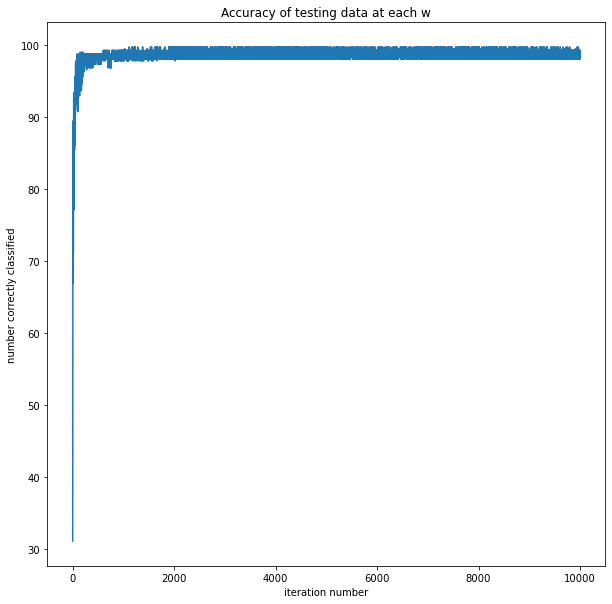

98.29683698296837


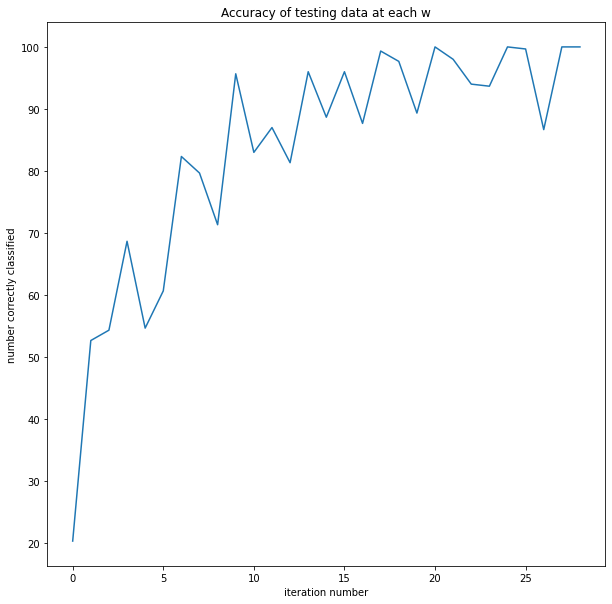

100.0


In [96]:
#passing values to functions
fname='/Users/durbasatpathi/Desktop/ml/dataset_LP_1.txt'
training_data,testing_data=process_data(fname)
w=perceptron(training_data,testing_data,1,10000)
x,y=testing(testing_data,w) 
print(y)
fname1='/Users/durbasatpathi/Desktop/ml/dataset_LP_2.csv'
training_data1,testing_data1=process_data(fname1)
w1=perceptron(training_data1,testing_data1,1,10000)
x1,y1=testing(testing_data1,w1)
print(y1)
